# Ejercicio 2: K-means: Agrupación sobre dataset iris y comparación con clasificación

In [1]:
# TODO: Importa todos los módulos necesarios en esta celda
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
# TODO: Descarga el dataset Iris
data = load_iris()
print(type(data))
X = data.data
y = data.target
print(X.shape)
print(y.shape)
print(data.keys())
print(data.feature_names)
print(X[:3])
#print(X[:,1])

<class 'sklearn.utils.Bunch'>
(150, 4)
(150,)
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]


In [3]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

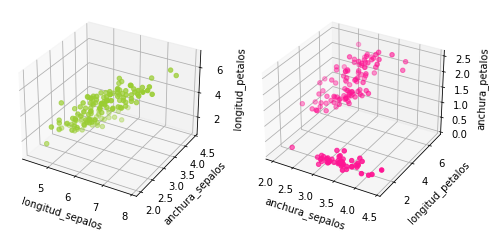

In [4]:
longitud_sepalos = X[:,0]
anchura_sepalos = X[:,1]
longitud_petalos = X[:,2]
anchura_petalos = X[:,3]

# TODO: Representa en 3D 3 características del dataset 4-dimensional
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1,2,1,projection = "3d")
ax.scatter(longitud_sepalos,anchura_sepalos,longitud_petalos, s=20,color="yellowgreen")
ax.set_xlabel('longitud_sepalos')
ax.set_ylabel('anchura_sepalos')
ax.set_zlabel('longitud_petalos')

ax = fig.add_subplot(1,2,2,projection = "3d")
ax.scatter(anchura_sepalos,longitud_petalos,anchura_petalos, s=20, color="deeppink")
ax.set_xlabel('anchura_sepalos')
ax.set_ylabel('longitud_petalos')
ax.set_zlabel('anchura_petalos')

plt.show()

In [5]:
# TODO: Reordena aleatoriamente, normaliza si es necesario y divide los datos en subsets de entrenamiento y test
X_reord, Y_reord = shuffle(X,y,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [6]:
# TODO: Entrena un modelo de K-means con Scikit-learn para 3 clústeres
kmeans = KMeans(n_clusters=3).fit(X_train)
kmeans_pred = kmeans.predict(X_test)

In [7]:
# TODO: Evalúa dicho modelo sin usar Y sobre el subset de test
print(kmeans.score(X_test))
print(metrics.silhouette_score(X_test,y_test,metric="euclidean"))

-14.150394520955079
0.5538417178134319


[[4.99       3.4525     1.45       0.245     ]
 [6.85517241 3.10344828 5.70689655 2.02068966]
 [5.85686275 2.73137255 4.38627451 1.44313725]]


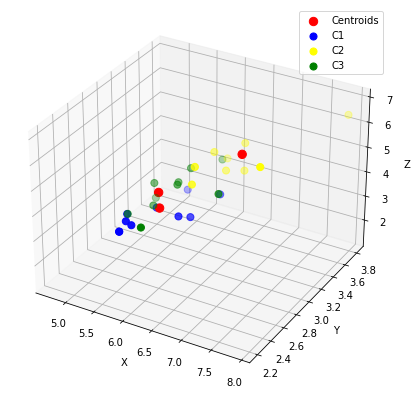

In [8]:
# TODO: Representa gráficamente los centroides y los ejemplos asignados a cada clúster en 3D
centroids = kmeans.cluster_centers_
print(centroids)

x = np.array(kmeans_pred==0)
y = np.array(kmeans_pred==1)
z = np.array(kmeans_pred==2)

fig = plt.figure("K-Means on Iris Dataset", figsize=(7,7))
ax = fig.add_subplot(projection = '3d')
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],c="red", s=70, label="Centroids",alpha=1)
ax.scatter(X_test[x,0],X_test[x,1],X_test[x,2], s=50,c="blue",label="C1")
ax.scatter(X_test[y,0],X_test[y,1],X_test[y,2], s=50,c="yellow",label="C2")
ax.scatter(X_test[z,0],X_test[z,1],X_test[z,2], s=50,c="green",label="C3")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()

In [9]:
print(len(X_test[x,0]))
print(len(X_test[y,0]))
print(len(X_test[z,0]))

10
10
10


In [10]:
# TODO: Entrena un modelo de SVC optimizando sus hiper-parámetros y kernel usado por CV con K-fold
kf = KFold(shuffle=True, n_splits = 4)
parameters = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'C':[0.001, 1, 10],'gamma':['auto']}
model = svm.SVC()
grid = GridSearchCV(model, param_grid=parameters, scoring = "r2",cv=kf)
best_model = grid.fit(X_train,y_train)

In [11]:
# TODO: Evalúa el mejor modelo sobre el subset de test
print(best_model.best_params_)
y_pred = best_model.predict(X_test)
score = best_model.score(X_test,y_test)
print("Coeficiente de determinacion R^2:",score)

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Coeficiente de determinacion R^2: 1.0


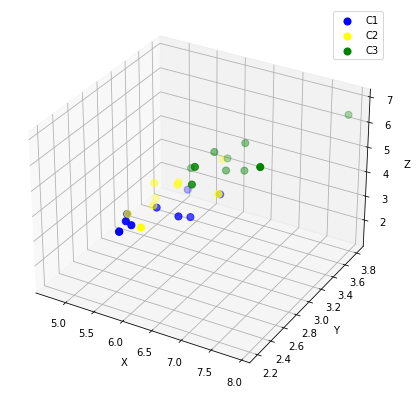

In [12]:
# TODO: Representa sus predicciones gráficamente en 3D

x_svc = np.array(y_pred==0)
y_svc = np.array(y_pred==1)
z_svc = np.array(y_pred==2)

fig = plt.figure("SVC on Iris Dataset", figsize=(7,7))
ax = fig.add_subplot(projection = '3d')
ax.scatter(X_test[x_svc,0],X_test[x_svc,1],X_test[x_svc,2], s=50,c="blue",label="C1")
ax.scatter(X_test[y_svc,0],X_test[y_svc,1],X_test[y_svc,2], s=50,c="yellow",label="C2")
ax.scatter(X_test[z_svc,0],X_test[z_svc,1],X_test[z_svc,2], s=50,c="green",label="C3")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()

In [13]:
print(len(X_test[x_svc,0]))
print(len(X_test[y_svc,0]))
print(len(X_test[z_svc,0]))

10
9
11


**¿Hay una gran diferencia en nº de ejemplos que estarían asignados a un clúster en agrupación y a una clase diferente en clasificación?
si, para un cluster el nº de ejemplos está distribuido en partes iguales en los 3 clusters. Mientras que para una clasificación hay un poco más de ejemplos en un grupo que en otro.**

También se encuentran los ejemplos en otro grupo. Los ejemplos que están en el grupo C1 del ejercicio de agrupación, se encuentran en el grupo C2 de la clasificación. Y los ejemplos del grupo C2 del ejercicio de agrupación, se encuentran en el grupo C1 de la clasificación. 

**¿Qué modelo acierta más?**

El modelo que más acierta es el de clasificación. Ya que tiene un score de 1.0 mientras que el de agrupación tiene -14.15. 

**¿Es capaz una agrupación de tener un resultado similar a un modelo de clasificación, cuando podemos evaluar la clase real**

No, porque un modelo de clustering y un modelo de clasificacion son 2 diferentes tipos de modelos de machine learning con dierentes objetivos y capacidades. Los modelos de agrupación son utilizados para agrupar puntos similares basados en su distancia, por lo que no predicen una clase especifica. mientras que el modelo de clasificacion es utilizado para predecir una clase basada en sus características de entrada y sus salidas.  

**¿Cómo es la división del espacio n-dimensional en ambos casos? ¿El espacio asignado a las clases y el asignado a los clústeres es similar en las representaciones gráficas?**

Si, en ambas se asigna el mismo espacio tanto para clases, como para clústers.
